# Spectral Clustering

## Overview

K-means assigns a cluster to a data point $p$ according to the closest deistance between $p$ and the centroids.
Thus the resulting geometry is absed on hyperspheres where all points share condition to be closer to the same centroid.
However, such an approach may be problematic when we deal with datasets that they are not separable using regular shapes.

In this section, we will consider <a href="https://en.wikipedia.org/wiki/Spectral_clustering">spectral clustering</a>.
Spectral clustering attacks the problem of clustering points from a different perspective. The approach that we will discuss herein
is similar to <a href="https://en.wikipedia.org/wiki/Label_propagation_algorithm">label propagation</a>.

## Spectral clustering

Given a collection of data points, we can always construct a graph $G=\{V,E\}$ where the vertices of the graph are the data points.
The question now is how do we construct the edges? The edges may be labelled accroding to how close a point $p$ may be to the
rest of the points. Thus we can have an affinity matrix $W$. 

The matrix $W$ can be built using different approaches. Usually, these are

- K-nearest neighbours
- Radial basis functions or RBF

When using a K-nearest neighbours approach to constuct $W$, then $w_{ij}$ can be given by either of the following options

$$w_{ij} = \begin{cases}1, ~~ \text{if} ~~ x_j ~~ \in ~~ Ball(x_i) \\ 0, ~~ \text{otherwise} \end{cases}$$

$$w_{ij} = \begin{cases}d(x_i, x_j), ~~ \text{if} ~~ x_j ~~ \in ~~ Ball(x_i) \\ 0, ~~ \text{otherwise} \end{cases}$$

In the latter case $W$ will represent a distance matrix. With K-nearest neighbours we are segmenting the original dataset into smaller regions that have high level 
of cohesion. However, this approach may lead to a graph $G$ that is not fully connected as samples
that have no neighbors may exist. Alternatively, we can use radial basis function. Then the elements in $W$ are given by

$$w_{ij} = exp\left(\gamma ||x_i - x_j||^2 \right)$$

With RBF the graph $G$ will be fully connected. The paramter $\gamma$ controls the amplitude of the Gaussian function and therefore it controls the number of points
with a large weight. We will see RBF again when we discuss ensemble learning and the <a href="https://en.wikipedia.org/wiki/Self-organizing_map">Kohonen map algorithm</a>.
In either case, $W$ represents a measure of affinity between the data points, whilst no restrictions have been imposed on the global geometry.
This is in contrast to what K-means does. 

Assuming that we have $W$ at our disposal, the normalized <a href="https://en.wikipedia.org/wiki/Laplacian_matrix">graph Laplacian</a> is defined as

$$L = I - D^{-1}W$$

where $D$ is defined as

$$D=diag \left( \sum_j w_{ij} \right)$$

The matrix $L$ contains information about the number of connected components. Therefore, we can use it as a new basis where the cluseters can be separated using regular geometric shapes.

## Example

This example uses  spectral clustering in order to cluster the anisotropic blob we have seen in the previous examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering

In [2]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)

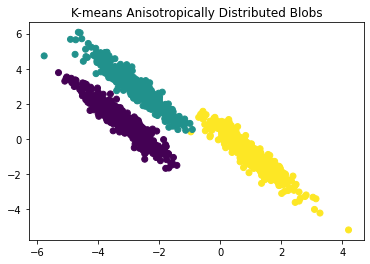

In [3]:
common_params = {
    "n_init": 4,
    "random_state": random_state,
    'affinity':'nearest_neighbors',
    'n_neighbors': 20
}
y_pred = SpectralClustering(n_clusters=3, **common_params).fit_predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Spectral clustering Anisotropically Distributed Blobs")
plt.show()

As can be seen, spectral clustering performs very good on the anisotropically distributed blob.

## Summary

In this section, we reviewed spectral clustering. In this approach, an affinity matrix is constructed for the points in the dataset.
We saw two approaches to construct the affinity matrix; the K-nearest neighbors and RBF. This approach does not impose any geometrical constraints
such these that K-means uses. The approach also requires the number of clusters as an input.

## References

1. <a href="https://en.wikipedia.org/wiki/Spectral_clustering">Spectral clustering</a>